In [60]:
import pandas as pd
import numpy as np

star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


In [61]:
# star_wars table info
print(star_wars.shape)
star_wars.columns

(1187, 38)


Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [62]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
print( star_wars['RespondentID'].notnull().value_counts() )

True    1186
Name: RespondentID, dtype: int64


In [63]:
cols = ['Have you seen any of the 6 films in the Star Wars franchise?',
        'Do you consider yourself to be a fan of the Star Wars film franchise?']
yes_no = {'Yes' : True, 'No' : False}

for col in cols :
    print(star_wars[col].value_counts())
    star_wars[col] = star_wars[col].map(yes_no)
    print(star_wars[col].value_counts(), '\n')
    
star_wars[cols].head(5)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64 

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64 



,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,True,True
2,False,NaN
3,True,False
4,True,True
5,True,True


In [64]:
movie_map = {
    'Star Wars: Episode I  The Phantom Menace' : True,
    'Star Wars: Episode II  Attack of the Clones' : True,
    'Star Wars: Episode III  Revenge of the Sith' : True,
    'Star Wars: Episode IV  A New Hope' : True,
    'Star Wars: Episode V The Empire Strikes Back' :True,
    'Star Wars: Episode VI Return of the Jedi' : True,
    np.nan : False
}

for col in star_wars.columns[3:9] :
    star_wars[col] = star_wars[col].map(movie_map)
    
star_wars[star_wars.columns[3:9]].head(3)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False


In [65]:
col_map = {
    'Which of the following Star Wars films have you seen? Please select all that apply.' : 'seen_1',
    'Unnamed: 4' : 'seen_2',
    'Unnamed: 5' : 'seen_3',
    'Unnamed: 6' : 'seen_4',
    'Unnamed: 7' : 'seen_5',
    'Unnamed: 8' : 'seen_6'
}

star_wars = star_wars.rename(columns=col_map)
star_wars[star_wars.columns[3:9]].head(3)

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False


In [66]:
'''
for col in star_wars.columns[9:15] :
    star_wars[col] = pd.to_numeric(star_wars[col], errors='coerce')
'''

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
star_wars[star_wars.columns[9:15]].head(3)

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


In [67]:
col_map = {
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
    'Unnamed: 10' : 'ranking_2',
    'Unnamed: 11' : 'ranking_3',
    'Unnamed: 12' : 'ranking_4',
    'Unnamed: 13' : 'ranking_5',
    'Unnamed: 14' : 'ranking_6'
}

star_wars = star_wars.rename(columns=col_map)
star_wars[star_wars.columns[9:15]].head(3)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


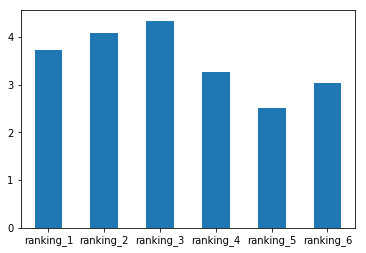

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

ranking = star_wars[star_wars.columns[9:15]].mean()
print(ranking)

ranking.plot.bar(rot=0)
plt.show()

# Star Wars: Episode V The Empire Strikes Back rank is the best ranking ! 

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


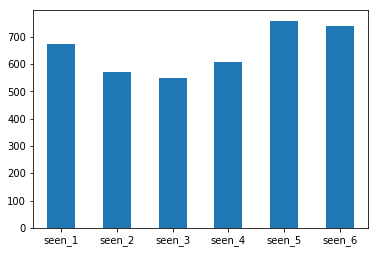

In [69]:
sum_seen = star_wars[star_wars.columns[3:9]].sum()
print(sum_seen)

sum_seen.plot.bar(rot=0)
plt.show()

# Star Wars: Episode V The Empire Strikes Back rank is the most people to see !
# Perhaps, this movie has some relationship with its highest ranking .

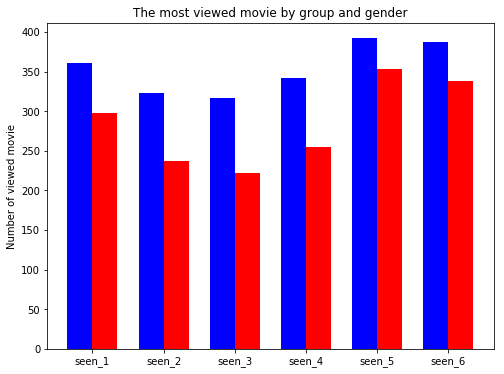

In [70]:
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

male_seen = male[male.columns[3:9]].sum()
female_seen = female[female.columns[3:9]].sum()
# print(male_seen)
# print(female_seen)

fig, ax = plt.subplots(figsize=(8, 6))
ind = np.arange( len(male_seen) )
width = 0.35

rects1 = ax.bar(ind, male_seen, width, color='b')
rects2 = ax.bar(ind + width, female_seen, width, color='r')

ax.set_ylabel('Number of viewed movie')
ax.set_title('The most viewed movie by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(female.columns[3:9])

plt.show()

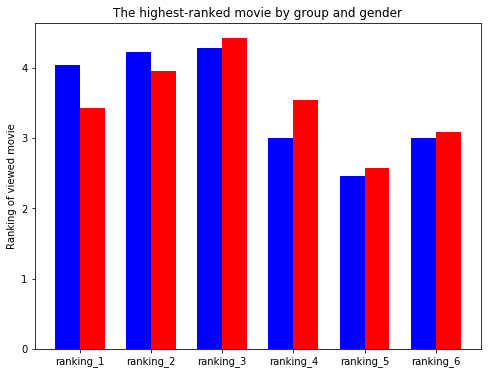

In [71]:
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

male_rating = male[male.columns[9:15]].mean()
female_rating = female[female.columns[9:15]].mean()
# print(male_seen)
# print(female_seen)

fig, ax = plt.subplots(figsize=(8, 6))
ind = np.arange( len(male_rating) )
width = 0.35

rects1 = ax.bar(ind, male_rating, width, color='b')
rects2 = ax.bar(ind + width, female_rating, width, color='r')

ax.set_ylabel('Ranking of viewed movie')
ax.set_title('The highest-ranked movie by group and gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(female.columns[9:15])

plt.show()

In [73]:
print(star_wars['Education'].value_counts())

pv_table = pd.pivot_table(star_wars, values=['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6'],
                   columns=['Education'], aggfunc=np.mean)
pv_table

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
High school degree                  105
Less than high school degree          7
Name: Education, dtype: int64


Education,Bachelor degree,Graduate degree,High school degree,Less than high school degree,Some college or Associate degree
ranking_1,3.828244,3.822222,3.802817,5.000000,3.551181
ranking_2,4.290076,4.225664,3.746479,5.333333,3.885827
ranking_3,4.521073,4.500000,4.126761,3.666667,4.102362
ranking_4,3.114504,3.199115,3.211268,2.666667,3.503937
ranking_5,2.309160,2.323009,2.873239,1.000000,2.783465
ranking_6,2.931298,2.920354,3.239437,3.333333,3.173228


In [74]:
print(star_wars['Location (Census Region)'].value_counts())

pv_table = pd.pivot_table(star_wars, values=['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6'],
                   columns=['Location (Census Region)'], aggfunc=np.mean)
pv_table

East North Central    181
Pacific               175
South Atlantic        170
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Name: Location (Census Region), dtype: int64


Location (Census Region),East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central
ranking_1,3.723881,3.87500,3.924731,4.000000,4.203390,3.582192,3.684211,3.671053,3.394737
ranking_2,4.074627,4.59375,4.215054,4.000000,4.166667,3.821918,4.180451,4.105263,4.118421
ranking_3,4.410448,4.37500,4.413043,4.279412,4.133333,4.171233,4.443609,4.355263,4.473684
ranking_4,3.358209,2.87500,3.064516,2.970588,3.083333,3.219178,3.406015,3.368421,3.657895
ranking_5,2.373134,2.25000,2.440860,2.794118,2.516667,2.739726,2.398496,2.552632,2.421053
ranking_6,3.059701,3.03125,2.924731,2.955882,2.866667,3.465753,2.887218,2.947368,2.934211


In [75]:
print(star_wars['Which character shot first?'].value_counts())

pv_table = pd.pivot_table(star_wars, values=['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6'],
                   columns=['Which character shot first?'], aggfunc=np.mean)
pv_table

Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64


Which character shot first?,Greedo,Han,I don't understand this question
ranking_1,3.857868,4.295385,3.042623
ranking_2,4.238579,4.298462,3.761438
ranking_3,4.426396,4.385802,4.238562
ranking_4,3.101523,2.769231,3.915033
ranking_5,2.370558,2.332308,2.816993
ranking_6,3.005076,2.913846,3.215686


In [76]:
characters_list = ['Han Solo', 'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker', 
           'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian',
           'Boba Fett', 'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda']

characters_map = {}

for i, character in enumerate(characters_list) :
    if i == 0 :
        characters_map['Please state whether you view the following characters favorably, unfavorably, \
or are unfamiliar with him/her.'] = character
    else :
        characters_map['Unnamed: ' + str(i+15)] = character        

star_wars = star_wars.rename(columns=characters_map)

favorably_map = {
    'Very favorably' : 5,
    'Somewhat favorably' : 4,
    'Neither favorably nor unfavorably (neutral)' : 3,
    'Somewhat unfavorably' : 2,
    'Very unfavorably' : 1 ,
    'Unfamiliar (N/A)' : np.nan
}

for character in characters_list :
    star_wars[character] = star_wars[character].map(favorably_map)

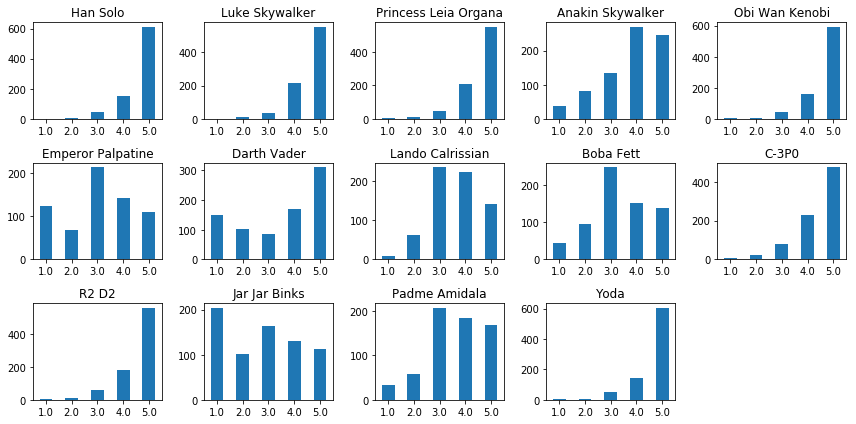

In [97]:
# Which character do respondents like the most?  A: Han Solo, Obi Wan Kenobi, Yoda
# Which character do respondents dislike the most?  A: Jar Jar Binks
# Which character is the most controversial (split between likes and dislikes)?  A: Darth Vader

fig = plt.figure(figsize=(12, 6))

for i, character in enumerate(characters_list) :
    
    ax = fig.add_subplot(3, 5, i+1)
    
    ax = star_wars[character].value_counts().sort_index(ascending=True).plot.bar(rot=0)
    ax.set_title(character)

plt.tight_layout()
plt.show()